In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,8)

In [2]:
%matplotlib inline
sns.set(color_codes = True)
pd.set_option("display.max_columns",50)

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

## Salaries of each customer

In [7]:
df_s = df[df.txn_description =='PAY/SALARY'].groupby('customer_id').mean()
df_s.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [8]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_s.loc[customer_id]["amount"]))

df['annual salary'] = salaries

In [9]:
df_c = df.groupby("customer_id").mean()
df_c.head()

,card_present_flag,merchant_code,balance,age,amount,annual salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


## Predictive analytics

### linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [11]:
N_train = int(len(df_c)*0.7)
X_train = df_c.drop("annual salary", axis=1).iloc[:N_train]
y_train = df_c["annual salary"].iloc[:N_train]
X_test = df_c.drop("annual salary", axis=1).iloc[N_train:]
y_test = df_c["annual salary"].iloc[N_train:]

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [13]:
lin_reg.score(X_train,y_train)

0.24688973319615737

In [14]:
lin_reg.score(X_test,y_test)

-0.23854072913735025

### Decision Tree Regression

In [15]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [16]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [17]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
y_train = df["annual salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
y_test = df["annual salary"].iloc[N_train:]

In [18]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
dt_reg.score(X_train,y_train)

0.7468978726536879

In [20]:
dt_reg.score(X_test,y_test)

0.6807164887865682

<AxesSubplot:>

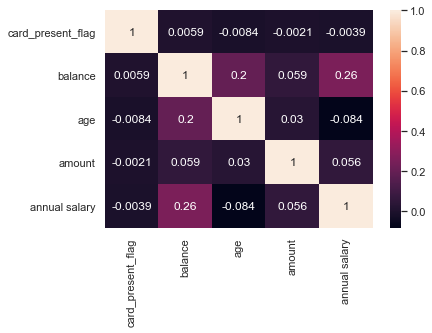

In [21]:
df =df.drop('merchant_code',axis=1)
sns.heatmap(df.corr(),annot=True)